<a href="https://colab.research.google.com/github/kigit2017/Clustering/blob/main/SFOEmployees_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv('/content/Employee_Salary_Compensation.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678524 entries, 0 to 678523
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  678524 non-null  int64  
 1   Job Family Code          678524 non-null  object 
 2   Job Code                 678524 non-null  object 
 3   Year Type                678524 non-null  object 
 4   Year                     678524 non-null  int64  
 5   Organization Group       678524 non-null  object 
 6   Department Code          678522 non-null  object 
 7   Department               678522 non-null  object 
 8   Union Code               678345 non-null  float64
 9   Union                    678345 non-null  object 
 10  Job Family               678524 non-null  object 
 11  Job                      678519 non-null  object 
 12  Employee Identifier      678524 non-null  int64  
 13  Salaries                 678524 non-null  float64
 14  Over

In [6]:
from pandas.core.dtypes.dtypes import dtypes
data_num=data.select_dtypes('float64')

Dropped Nan columns from data_num

In [7]:
data_num.dropna(inplace=True)

In [8]:
data_num.isna().sum()

Union Code            0
Salaries              0
Overtime              0
Other Salaries        0
Total Salary          0
Retirement            0
Health and Dental     0
Other Benefits        0
Total Benefits        0
Total Compensation    0
dtype: int64

In [9]:
data_num.describe()

,Union Code,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,678345.000000,678345.000000,678345.000000,678345.000000,678345.000000,678345.000000,678345.000000,678345.000000,678345.000000,678345.000000
mean,492.617360,70641.865870,5593.902543,3870.773346,79885.618514,14078.216101,10120.218034,5098.578466,29297.012601,109182.631115
std,330.556581,48187.433333,13326.268985,8632.376353,56227.282931,10392.338836,5849.979938,3748.143884,18200.394240,73057.009357
min,1.000000,-68771.780000,-12308.660000,-19131.100000,-68771.780000,-30621.430000,-3831.090000,-10636.500000,-21295.150000,-74082.610000
25%,250.000000,30554.530000,0.000000,0.000000,33487.530000,5069.840000,4937.900000,1939.100000,12507.350000,46895.340000
50%,535.000000,68960.700000,0.000000,720.000000,76112.410000,14251.590000,12512.550000,4967.030000,33107.370000,109410.930000
75%,790.000000,101908.510000,4431.160000,4401.290000,114280.740000,20620.820000,14393.110000,7621.720000,41568.850000,156623.780000
max,990.000000,651936.710000,321523.310000,568163.120000,658867.570000,128694.620000,59405.230000,35691.040000,166068.180000,807625.250000


Delete 1 row has missing salaries

In [10]:
data_num.dropna(axis=0,subset=['Salaries','Union Code'],inplace=True)

Droped 'Union code' column

In [11]:
data_num=data_num.drop('Union Code',1)

<ipython-input-11-30e1209d6a2b>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_num=data_num.drop('Union Code',1)


In [12]:
data_num.describe()

,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,678345.000000,678345.000000,678345.000000,678345.000000,678345.000000,678345.000000,678345.000000,678345.000000,678345.000000
mean,70641.865870,5593.902543,3870.773346,79885.618514,14078.216101,10120.218034,5098.578466,29297.012601,109182.631115
std,48187.433333,13326.268985,8632.376353,56227.282931,10392.338836,5849.979938,3748.143884,18200.394240,73057.009357
min,-68771.780000,-12308.660000,-19131.100000,-68771.780000,-30621.430000,-3831.090000,-10636.500000,-21295.150000,-74082.610000
25%,30554.530000,0.000000,0.000000,33487.530000,5069.840000,4937.900000,1939.100000,12507.350000,46895.340000
50%,68960.700000,0.000000,720.000000,76112.410000,14251.590000,12512.550000,4967.030000,33107.370000,109410.930000
75%,101908.510000,4431.160000,4401.290000,114280.740000,20620.820000,14393.110000,7621.720000,41568.850000,156623.780000
max,651936.710000,321523.310000,568163.120000,658867.570000,128694.620000,59405.230000,35691.040000,166068.180000,807625.250000


In [13]:
#data.drop[]

clustering with K means

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters=4,random_state=42)

In [15]:
kmeans.fit(data_num)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [17]:
dat_cols=data_num.columns

In [18]:
dat_cols= data_num[:].values

In [27]:
kmeans = KMeans(n_clusters=4,random_state=42)

In [28]:
kmeans.fit(dat_cols)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [29]:
cluster_centers=kmeans.cluster_centers_
cluster_assignments = kmeans.labels_
#k =kmeans.inertia_

In [30]:
import matplotlib.pyplot as plt

In [31]:
dat_cols.shape

(678345, 9)

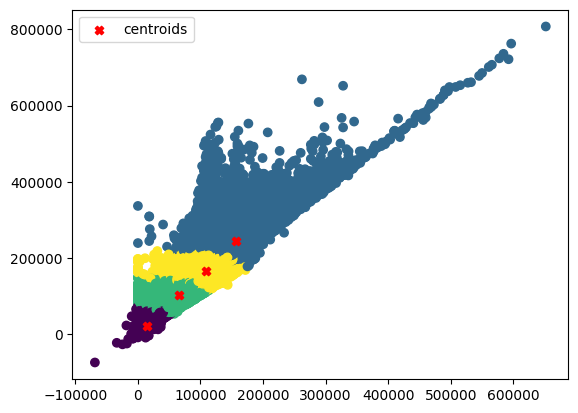

In [33]:
plt.scatter(dat_cols[:,0],dat_cols[:,8],c = cluster_assignments, cmap='viridis')
plt.scatter(cluster_centers[:,0],cluster_centers[:,8],c='red',marker='X',label='centroids')
plt.legend()
plt.show()

Find best K value using elbow curve

In [34]:
wcss =[]

In [35]:
k_range = range(1,11)

In [36]:
for k_cols in k_range:
  kmeans = KMeans(n_clusters=k_cols,random_state=42)
  kmeans.fit(dat_cols)
  wcss.append(kmeans.inertia_)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

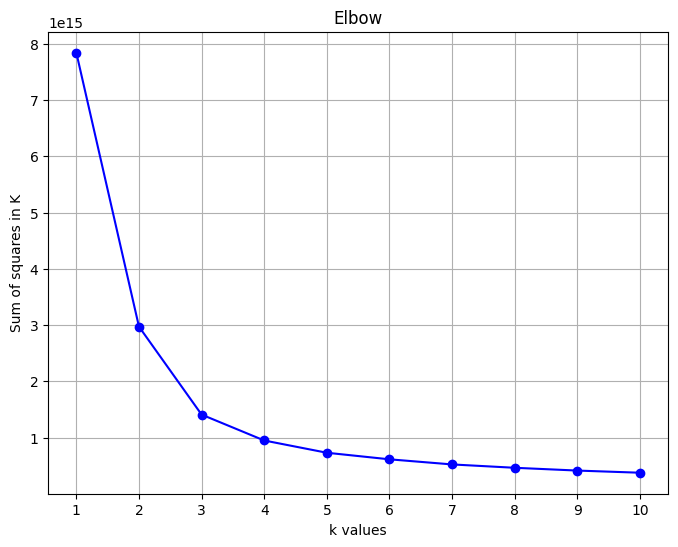

In [37]:
plt.figure(figsize= (8,6))
plt.plot(k_range,wcss,marker='o',linestyle='-',color='b')
plt.title('Elbow')
plt.xlabel('k values')
plt.ylabel('Sum of squares in K')
plt.xticks(k_range)
plt.grid(True)
plt.show()

k = 4 is optimal value for the dataset.

Heirarchical clustering

In [29]:
from scipy.cluster.hierarchy import linkage,dendrogram

In [ ]:
plt.figure(figsize=(10,8))
linkage_matrix = linkage(dat_cols,method='ward')
dendrogram(linkage_matrix,p=5,truncate_mode='level',distance_srt='descending',orientation='bottom')
plt.xlabel('data points')
plt.ylabel('distance')
